In [ ]:
!pip install --upgrade tsmoothie

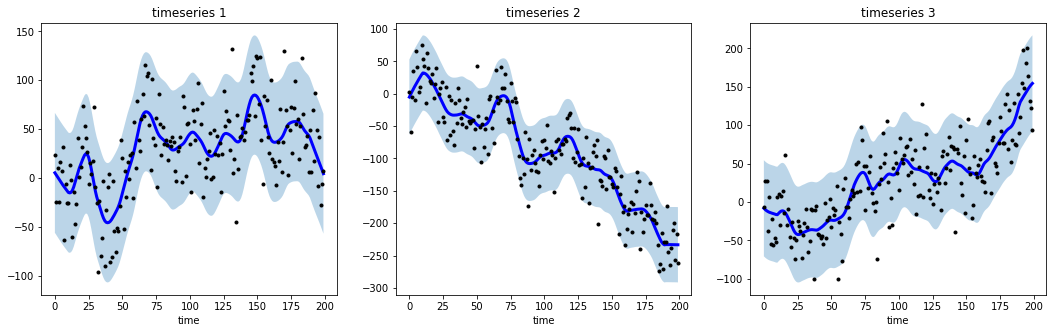

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from tsmoothie.utils_func import sim_randomwalk
from tsmoothie.smoother import LowessSmoother

# generate 3 randomwalks of lenght 200
np.random.seed(123)
data = sim_randomwalk(n_series=3, timesteps=200, 
                      process_noise=10, measure_noise=30)

# operate smoothing
smoother = LowessSmoother(smooth_fraction=0.1, iterations=1)
smoother.smooth(data)

# generate intervals
low, up = smoother.get_intervals('prediction_interval')

# plot the smoothed timeseries with intervals
plt.figure(figsize=(18,5))

for i in range(3):
    
    plt.subplot(1,3,i+1)
    plt.plot(smoother.smooth_data[i], linewidth=3, color='blue')
    plt.plot(smoother.data[i], '.k')
    plt.title(f"timeseries {i+1}"); plt.xlabel('time')

    plt.fill_between(range(len(smoother.data[i])), low[i], up[i], alpha=0.3)

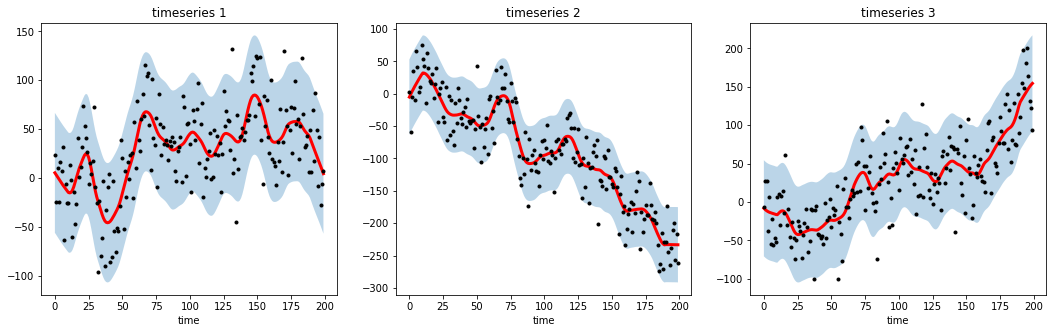

In [ ]:
plt.figure(figsize=(18,5))
for i in range(3):
    
    plt.subplot(1,3,i+1)
    plt.plot(smoother.smooth_data[i], linewidth=3, color='red')
    plt.plot(smoother.data[i], '.k')
    plt.title(f"timeseries {i+1}"); plt.xlabel('time')

    plt.fill_between(range(len(smoother.data[i])), low[i], up[i], alpha=0.3)

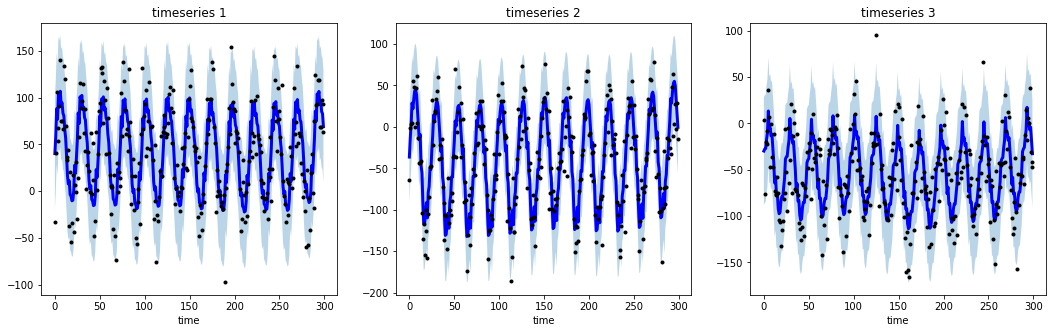

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from tsmoothie.utils_func import sim_seasonal_data
from tsmoothie.smoother import DecomposeSmoother

# generate 3 periodic timeseries of lenght 300
np.random.seed(123)
data = sim_seasonal_data(n_series=3, timesteps=300, 
                         freq=24, measure_noise=30)

# operate smoothing
smoother = DecomposeSmoother(smooth_type='lowess', periods=24,
                             smooth_fraction=0.3)
smoother.smooth(data)

# generate intervals
low, up = smoother.get_intervals('sigma_interval')

# plot the smoothed timeseries with intervals
plt.figure(figsize=(18,5))

for i in range(3):
    
    plt.subplot(1,3,i+1)
    plt.plot(smoother.smooth_data[i], linewidth=3, color='blue')
    plt.plot(smoother.data[i], '.k')
    plt.title(f"timeseries {i+1}"); plt.xlabel('time')

    plt.fill_between(range(len(smoother.data[i])), low[i], up[i], alpha=0.3)

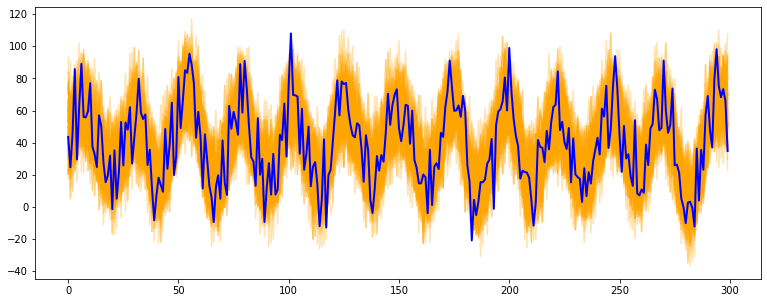

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from tsmoothie.utils_func import sim_seasonal_data
from tsmoothie.smoother import ConvolutionSmoother
from tsmoothie.bootstrap import BootstrappingWrapper

# generate a periodic timeseries of lenght 300
np.random.seed(123)
data = sim_seasonal_data(n_series=1, timesteps=300, 
                         freq=24, measure_noise=15)

# operate bootstrap
bts = BootstrappingWrapper(ConvolutionSmoother(window_len=8, window_type='ones'), 
                           bootstrap_type='mbb', block_length=24)
bts_samples = bts.sample(data, n_samples=100)

# plot the bootstrapped timeseries
plt.figure(figsize=(13,5))
plt.plot(bts_samples.T, alpha=0.3, c='orange')
plt.plot(data[0], c='blue', linewidth=2)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('result_ctg_mth_sales.csv')
df.columns = [c.lower() for c in df.columns]
df.columns = ['prod_category', 'fscl_mth_end_dt', 'ctg_mth_sales_units']
df = df[df.prod_category!=217]
orig_df = df.copy()
df.set_index('fscl_mth_end_dt', inplace=True)
df

,prod_category,ctg_mth_sales_units
fscl_mth_end_dt,,
2017-02-04,1,507350.0
2017-02-04,4,1012705.0
2017-02-04,17,240564.0
2017-02-04,18,457520.0
2017-02-04,19,59439.0
...,...,...
2021-11-27,199,4009.0
2021-11-27,201,60360.0
2021-11-27,224,901.0


********************************************
Processing category 1


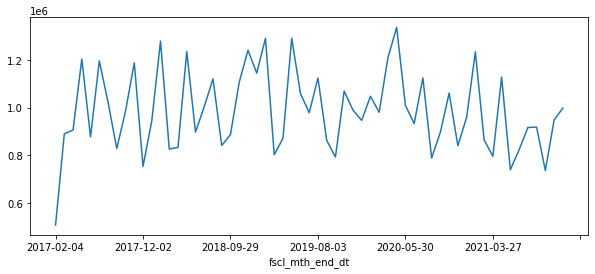

********************************************
Processing category 4


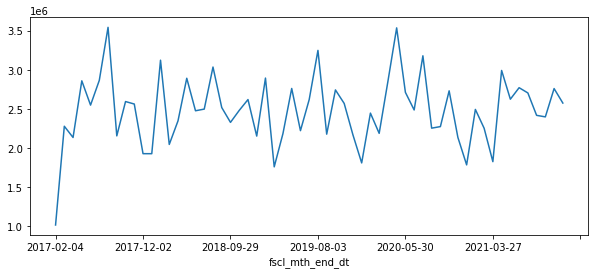

********************************************
Processing category 17


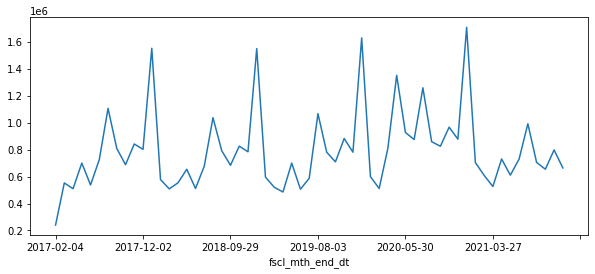

********************************************
Processing category 18


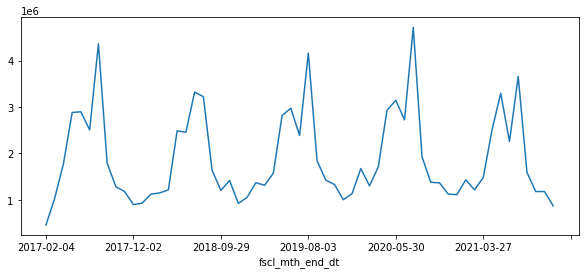

********************************************
Processing category 19


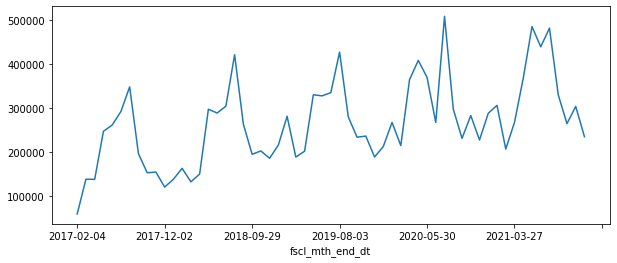

********************************************
Processing category 22


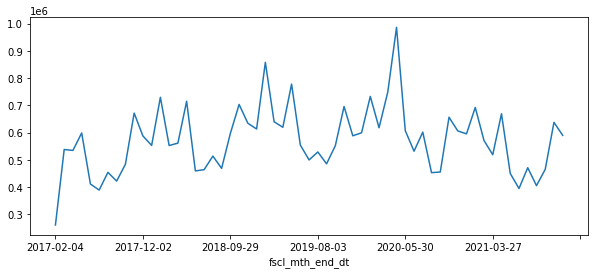

********************************************
Processing category 23


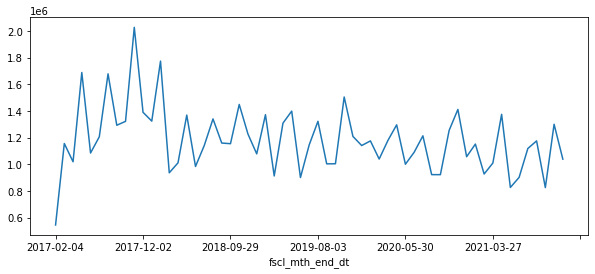

********************************************
Processing category 25


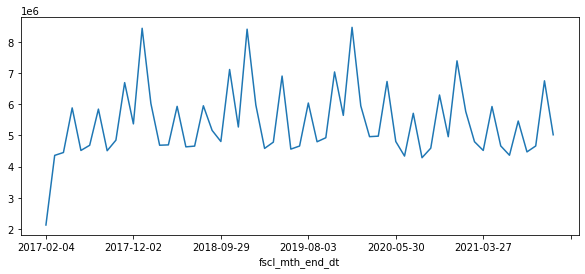

********************************************
Processing category 26


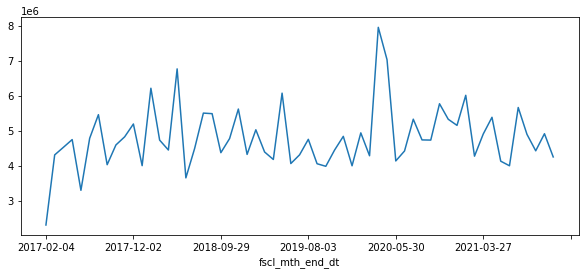

********************************************
Processing category 27


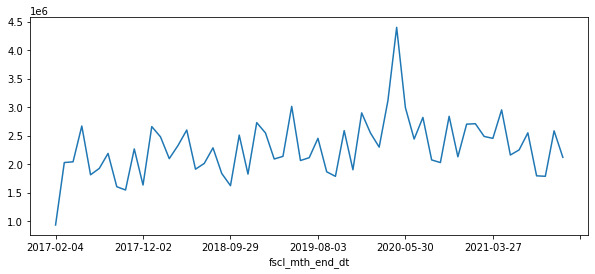

********************************************
Processing category 29


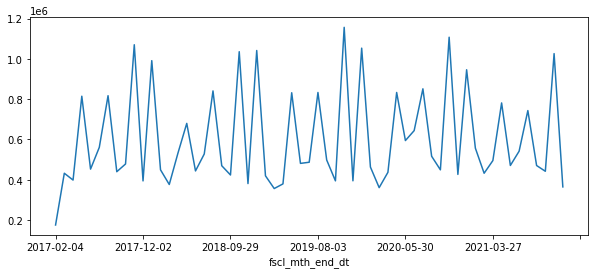

********************************************
Processing category 48


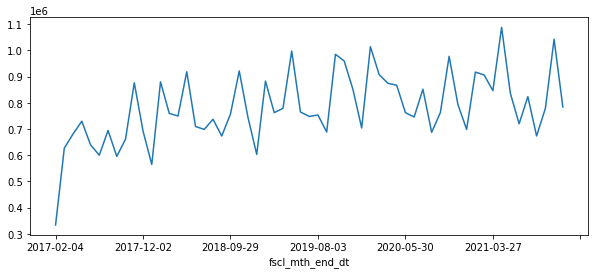

********************************************
Processing category 50


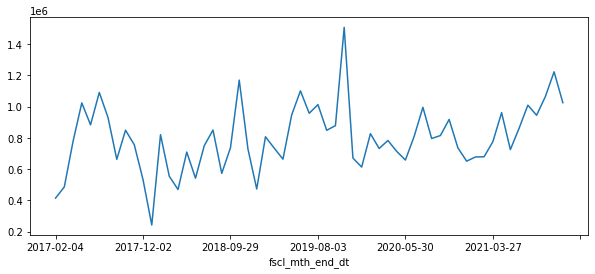

********************************************
Processing category 51


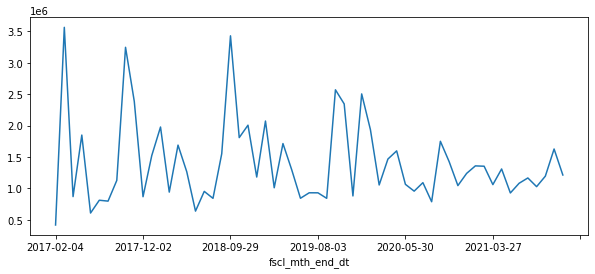

********************************************
Processing category 54


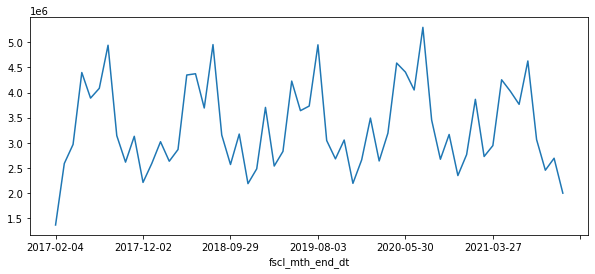

********************************************
Processing category 58


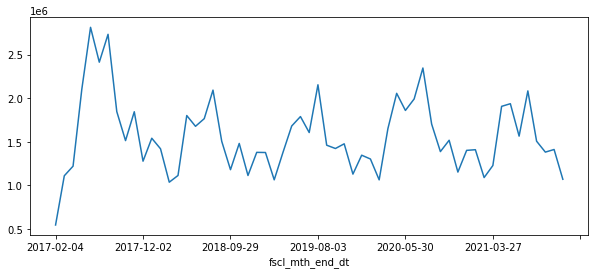

********************************************
Processing category 60


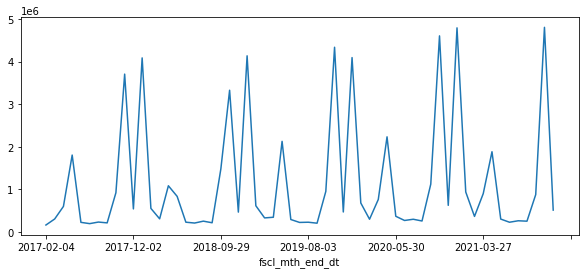

********************************************
Processing category 61


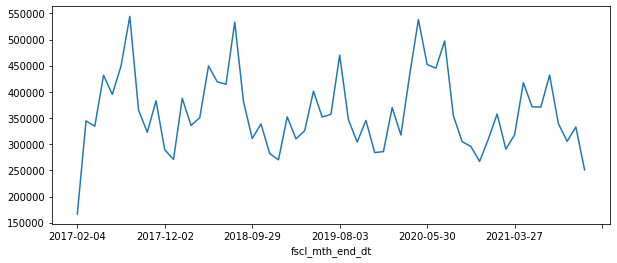

********************************************
Processing category 64


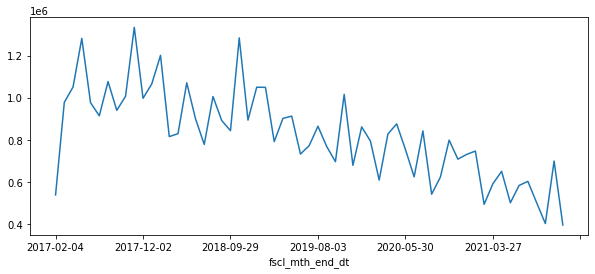

********************************************
Processing category 70


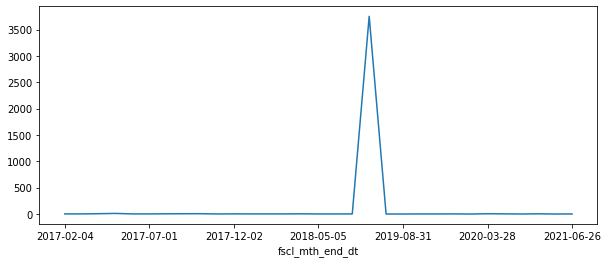

********************************************
Processing category 130


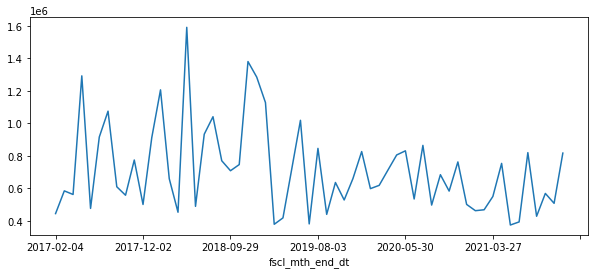

********************************************
Processing category 131


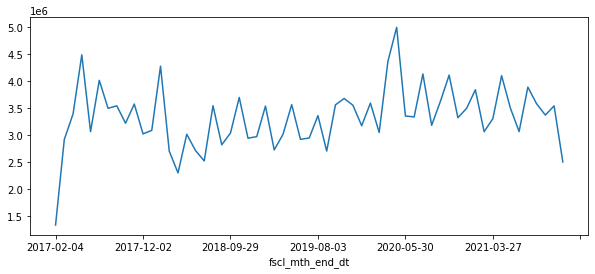

********************************************
Processing category 132


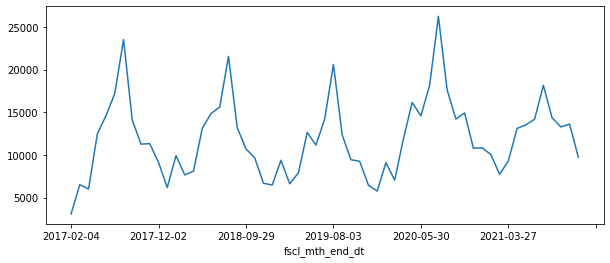

********************************************
Processing category 133


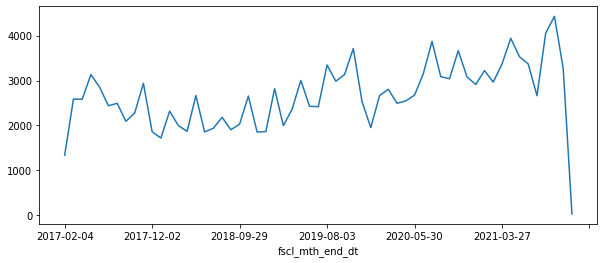

********************************************
Processing category 134


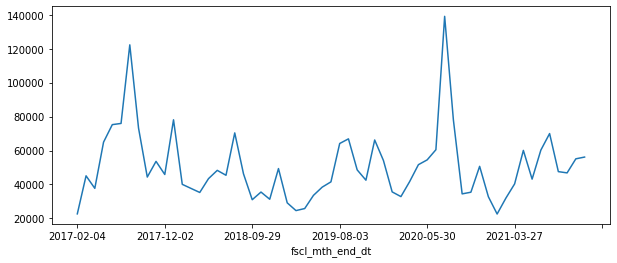

********************************************
Processing category 135


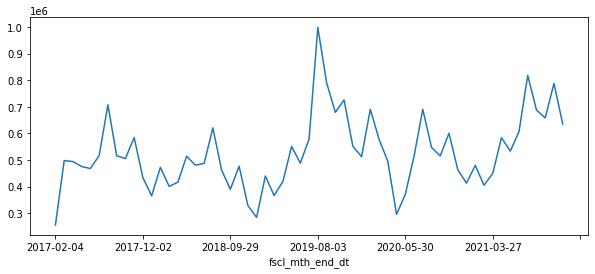

********************************************
Processing category 136


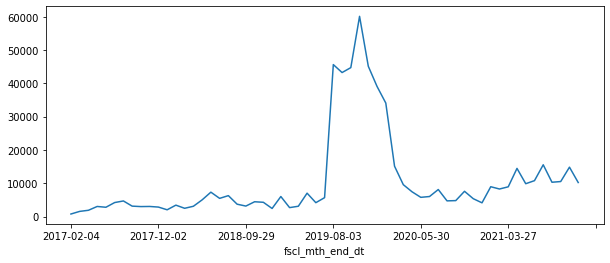

********************************************
Processing category 137


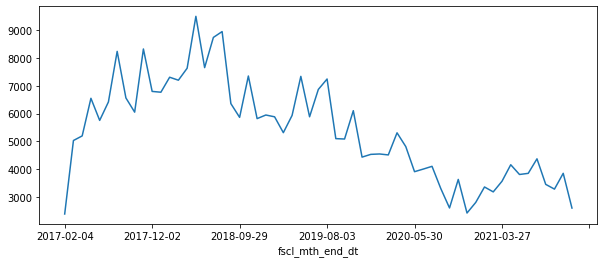

********************************************
Processing category 138


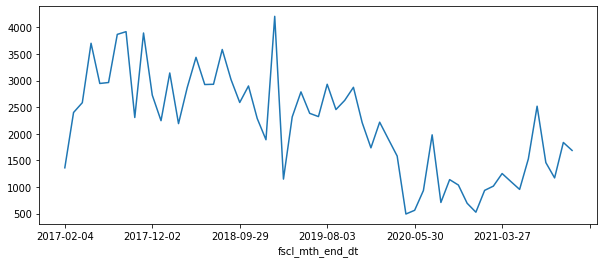

********************************************
Processing category 139


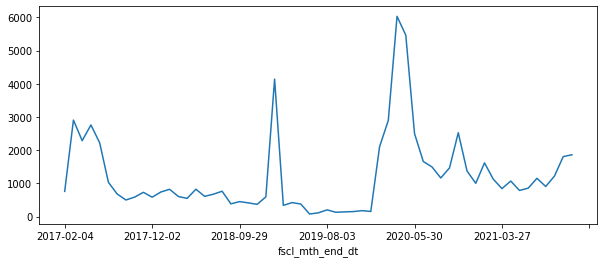

********************************************
Processing category 140


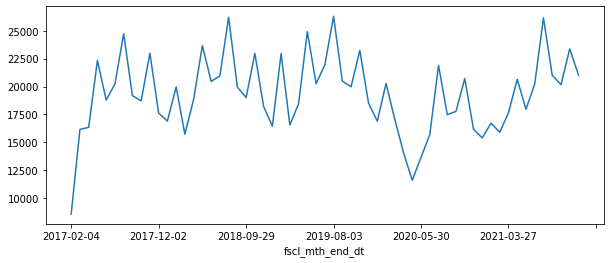

********************************************
Processing category 141


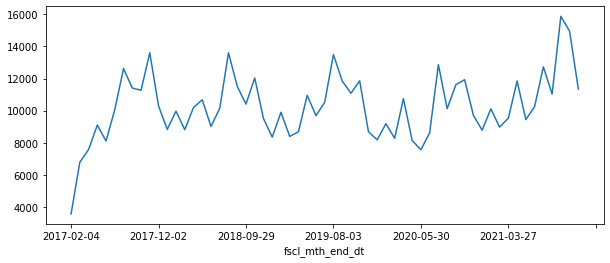

********************************************
Processing category 142


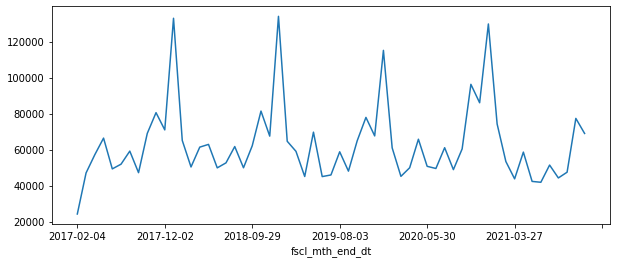

********************************************
Processing category 143


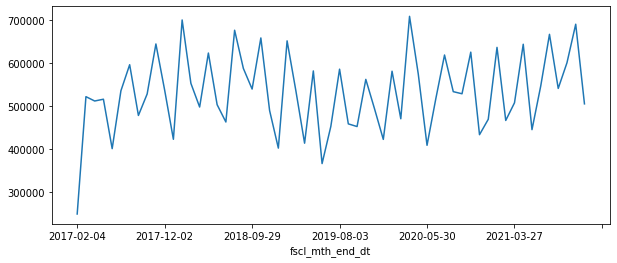

********************************************
Processing category 166


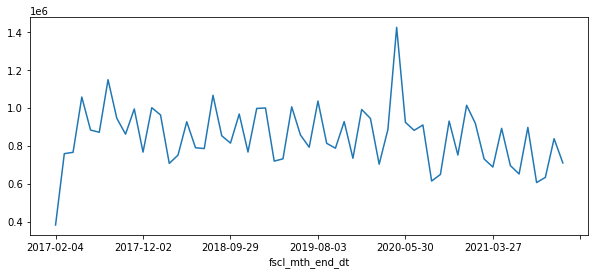

********************************************
Processing category 167


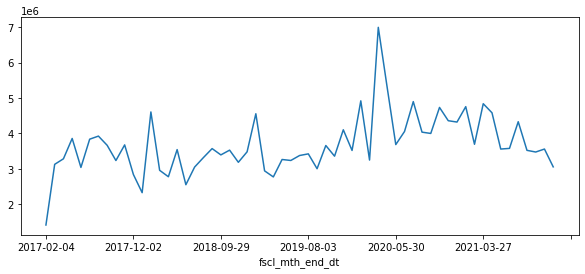

********************************************
Processing category 168


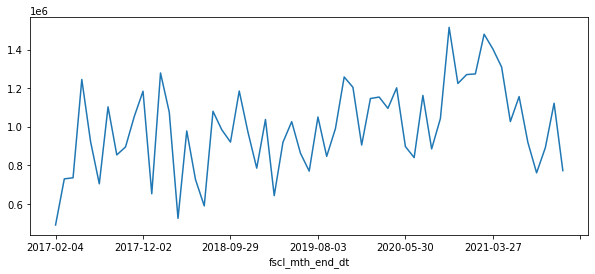

********************************************
Processing category 169


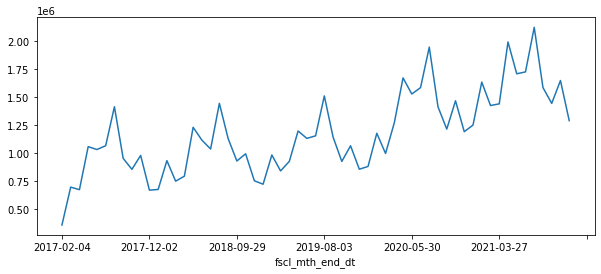

********************************************
Processing category 189


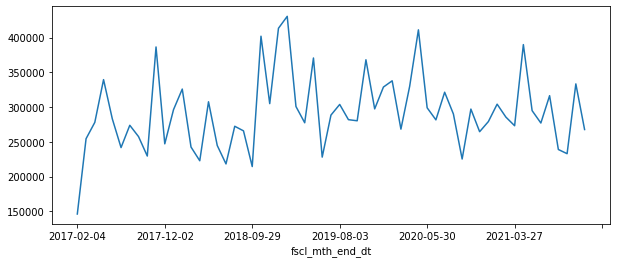

********************************************
Processing category 193


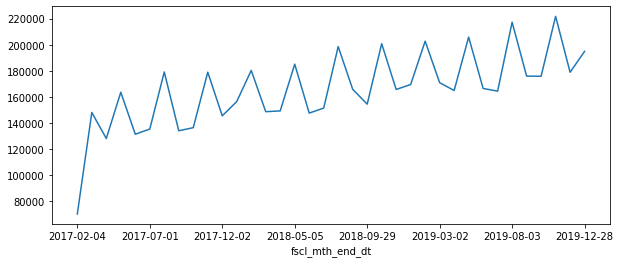

********************************************
Processing category 194


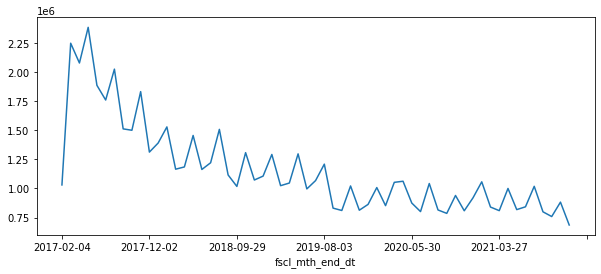

********************************************
Processing category 196


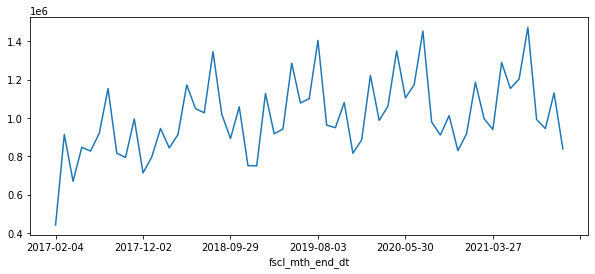

********************************************
Processing category 198


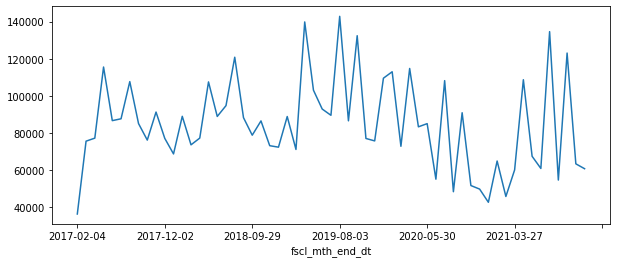

********************************************
Processing category 199


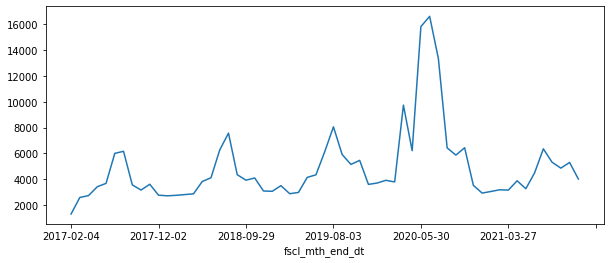

********************************************
Processing category 201


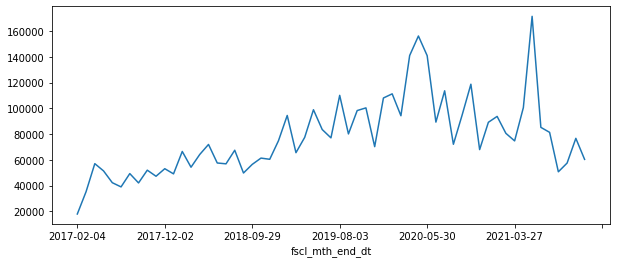

********************************************
Processing category 224


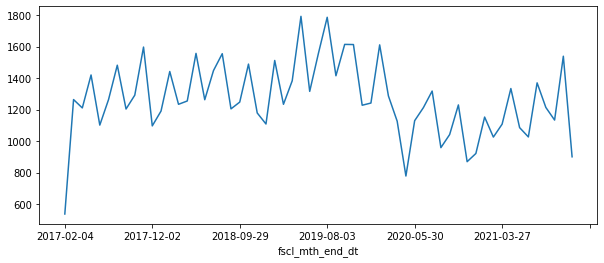

********************************************
Processing category 233


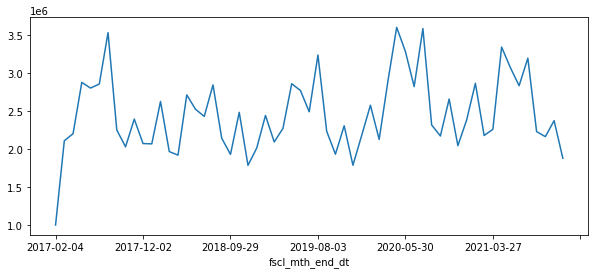

********************************************
Processing category 234


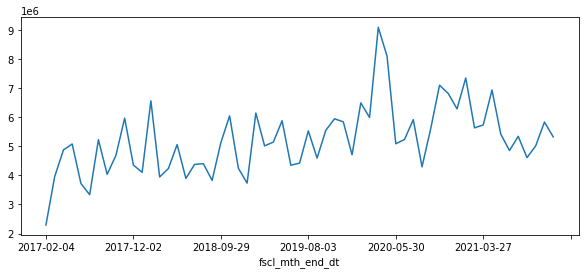

********************************************
Processing category 6


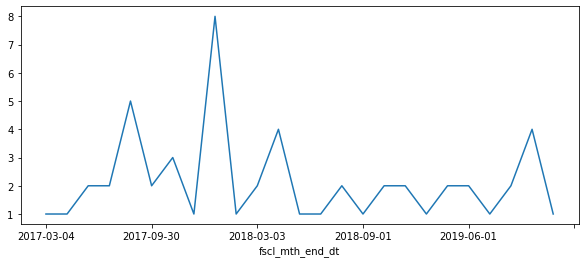

********************************************
Processing category 45


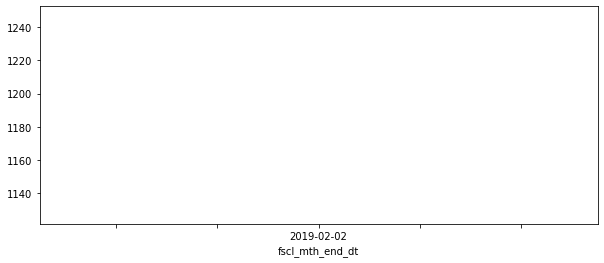

********************************************
Processing category 99


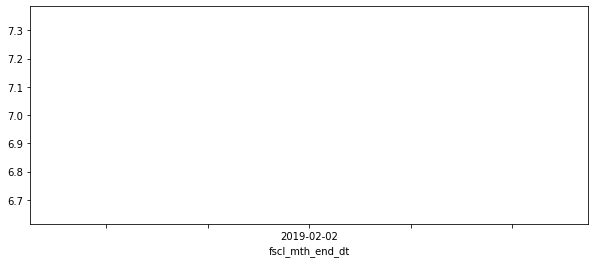

********************************************
Processing category 225


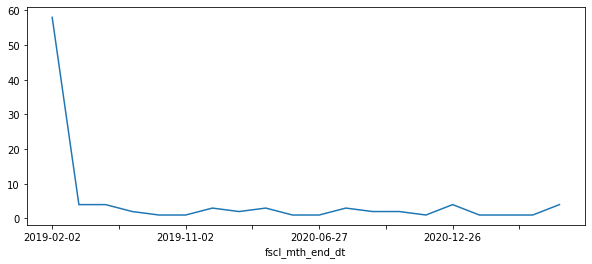

********************************************
Processing category 230


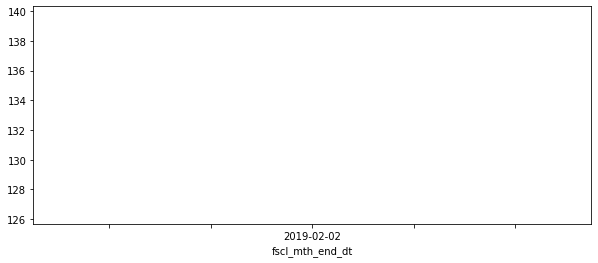

********************************************
Processing category 200


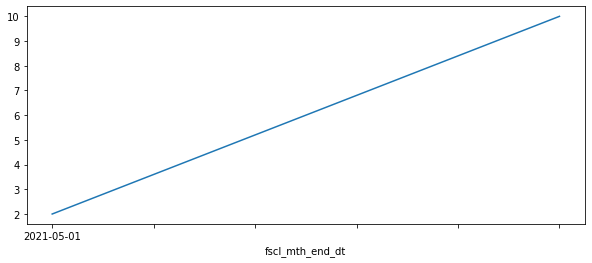

In [ ]:
for ctg in df['prod_category'].drop_duplicates().values.tolist():
    print("********************************************")
    print("Processing category " + str(ctg))
    df[df.prod_category==ctg]['ctg_mth_sales_units'].plot(figsize=(10,4))
    plt.show( block=False )

In [ ]:
df[df.prod_category==200]

,prod_category,ctg_mth_sales_units
fscl_mth_end_dt,,
2021-05-01,200,2.0
2021-07-31,200,10.0


In [ ]:
df[df.prod_category==230]

,prod_category,ctg_mth_sales_units
fscl_mth_end_dt,,
2019-02-02,230,133.0


In [ ]:
df[df.prod_category==99]

,prod_category,ctg_mth_sales_units
fscl_mth_end_dt,,
2019-02-02,99,7.0


In [ ]:
df[df.prod_category==45]

,prod_category,ctg_mth_sales_units
fscl_mth_end_dt,,
2019-02-02,45,1187.0


In [ ]:
df[df.prod_category==217]

,prod_category,ctg_mth_sales_units
fscl_mth_end_dt,,


In [ ]:
df[df.prod_category==6]

,prod_category,ctg_mth_sales_units
fscl_mth_end_dt,,
2017-03-04,6,1.0
2017-04-01,6,1.0
2017-07-01,6,2.0
2017-08-05,6,2.0
2017-09-02,6,5.0
2017-09-30,6,2.0
2017-11-04,6,3.0
2017-12-02,6,1.0
2017-12-30,6,8.0


In [ ]:
df[df.prod_category==70]

,prod_category,ctg_mth_sales_units
fscl_mth_end_dt,,
2017-02-04,70,3.0
2017-03-04,70,3.0
2017-04-01,70,7.0
2017-05-06,70,12.0
2017-06-03,70,3.0
2017-07-01,70,3.0
2017-08-05,70,5.0
2017-09-02,70,6.0
2017-09-30,70,7.0


In [ ]:
df[df.prod_category==193]

,prod_category,ctg_mth_sales_units
fscl_mth_end_dt,,
2017-02-04,193,69856.0
2017-03-04,193,147922.0
2017-04-01,193,127914.0
2017-05-06,193,163497.0
2017-06-03,193,131195.0
2017-07-01,193,135190.0
2017-08-05,193,179085.0
2017-09-02,193,133843.0
2017-09-30,193,136264.0


In [ ]:
df[df.prod_category==225]

,prod_category,ctg_mth_sales_units
fscl_mth_end_dt,,
2019-02-02,225,58.0
2019-05-04,225,4.0
2019-06-01,225,4.0
2019-06-29,225,2.0
2019-09-28,225,1.0
2019-11-02,225,1.0
2019-11-30,225,3.0
2020-03-28,225,2.0
2020-05-02,225,3.0


In [ ]:
orig_df[['prod_category']].value_counts()

prod_category
234              59
50               59
233              59
132              59
131              59
130              59
64               59
61               59
60               59
58               59
54               59
51               59
48               59
135              59
29               59
27               59
26               59
25               59
23               59
22               59
19               59
18               59
17               59
4                59
134              59
133              59
136              59
167              59
224              59
201              59
199              59
198              59
196              59
194              59
137              59
169              59
168              59
189              59
166              59
143              59
142              59
141              59
140              59
139              59
138              59
1                59
193              36
70               31
6                25
225   